# Importing :

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Loading :**

In [28]:
df = pd.read_csv('/content/50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Extracting :

**Extracting :**

In [29]:
X = df.drop('Profit', axis=1)
y = df['Profit']

In [30]:
X.head(2)

,R&D Spend,Administration,Marketing Spend,State
0,165349.2,136897.80,471784.10,New York
1,162597.7,151377.59,443898.53,California


In [31]:
y.head(2)

,Profit
0,192261.83
1,191792.06


**EDA:**

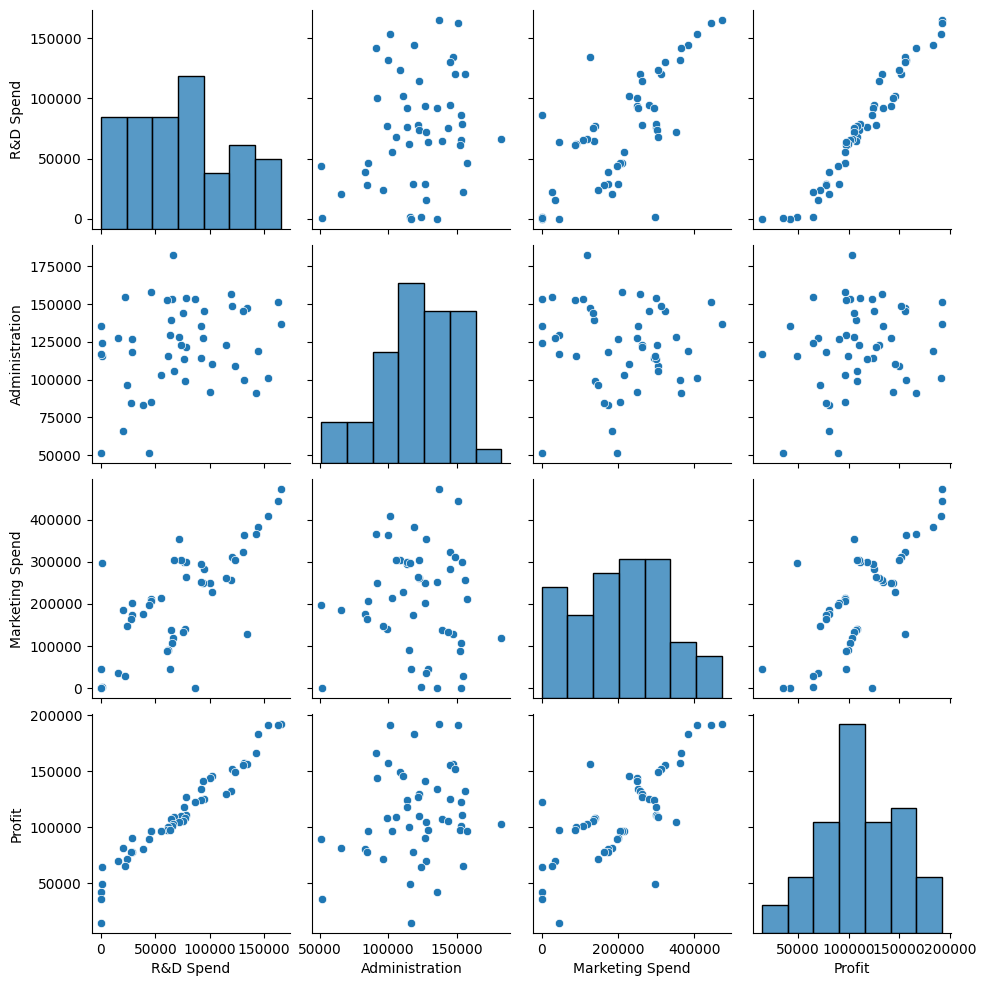

In [32]:
sns.pairplot(df)

In [33]:
X = pd.get_dummies(X, columns=['State'], drop_first=True)
X.head()

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,165349.20,136897.80,471784.10,False,True
1,162597.70,151377.59,443898.53,False,False
2,153441.51,101145.55,407934.54,True,False
3,144372.41,118671.85,383199.62,False,True
4,142107.34,91391.77,366168.42,True,False


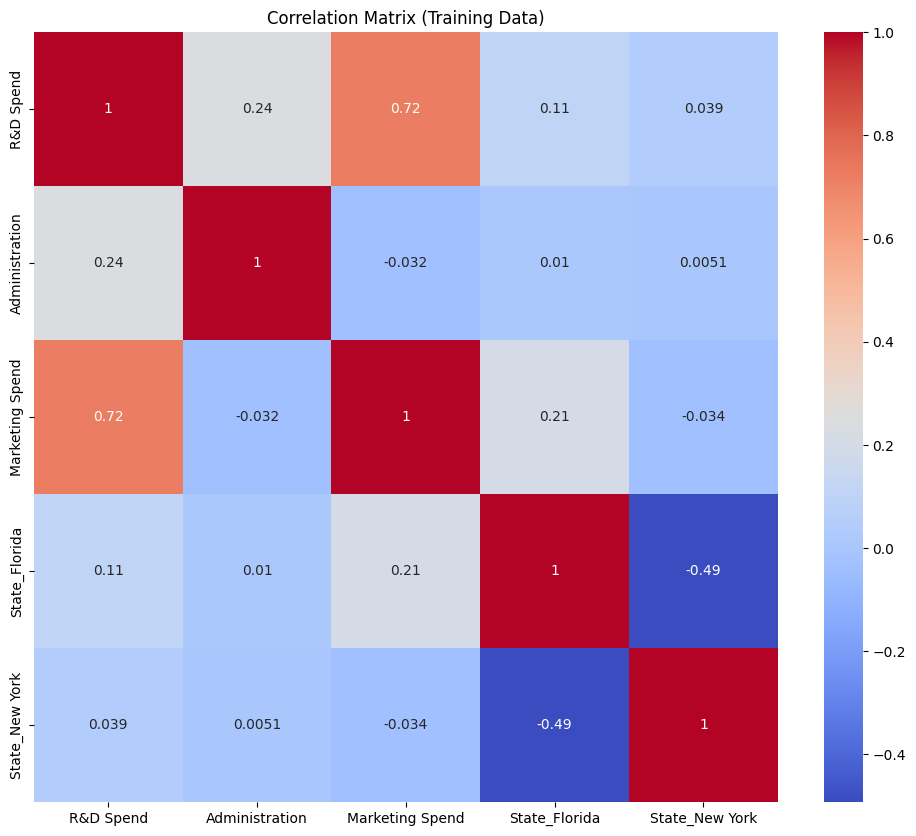

In [34]:
# Correlation heatmap (train set)
plt.figure(figsize=(12, 10))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (Training Data)")
plt.show()

Feature Selection:

In [35]:
def correlation(X, threshold):
    col_corr = set()
    corr_matrix = X.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X, 0.7)
X = X.drop(corr_features, axis=1)

In [36]:
X.head()

,R&D Spend,Administration,State_Florida,State_New York
0,165349.20,136897.80,False,True
1,162597.70,151377.59,False,False
2,153441.51,101145.55,True,False
3,144372.41,118671.85,False,True
4,142107.34,91391.77,True,False


# Mainipulation:

**Spliting :**

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**Scaling :**

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Model:

**Modeling :**

In [45]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

**Predicting :**

In [46]:
y_pred = regressor.predict(X_test)

**Evaluation :**

In [47]:
from sklearn.metrics import r2_score , mean_squared_error
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

66885723.0144466
0.9477002402858977


In [48]:
import pickle
pickle.dump(regressor, open('model.pkl', 'wb'))

In [49]:
pickle.dump(scaler, open('scaler.pkl', 'wb'))